In [1]:
import pandas as bpd
import numpy as np
from notebook.services.config import ConfigManager
import matplotlib.pyplot as plt
%matplotlib inline

cm = ConfigManager()
cm.update(
    "livereveal", {
        "width": "90%",
        "height": "70%",
        "scroll": True,
})

{'width': '90%', 'height': '70%', 'scroll': True}

# DSC 10 Discussion Week 3
---

# What have we learned so far?
---

1. Python
  - Assigning variables
  - Working with data types
  - Calling functions
  - Defining functions
  - If... elif... else...
2. Arrays
  - Creating arrays (same type!)
  - Operations between arrays (add, mult)
  - Adding elements to arrays (using np.append)
3. Tables
  - Reading tables
  - Creating new tables
  - Grabbing data from columns
  - Creating a copy with additional columns
  - Creating a copy with only certain columns
  - Creating a copy with only certain rows
  - Creating a copy with rows grouped on a column and a collection function
4. Plots
  - Creating bar charts 
  - Creating scatter plots & line plots 
  - Creating histograms to count occurrences/density

# Any questions about recent things in class?
---

We don't necessarily need to get through this entire notebook, you can treat it more as a practice test that we're doing together.

# Ultimate Halloween Candy Showdown
---
269,000 user submitted winners of head to head candy matchups

In [2]:
candy = bpd.read_csv("data/candy.csv")
candy = candy.set_index("competitorname")
candy

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519


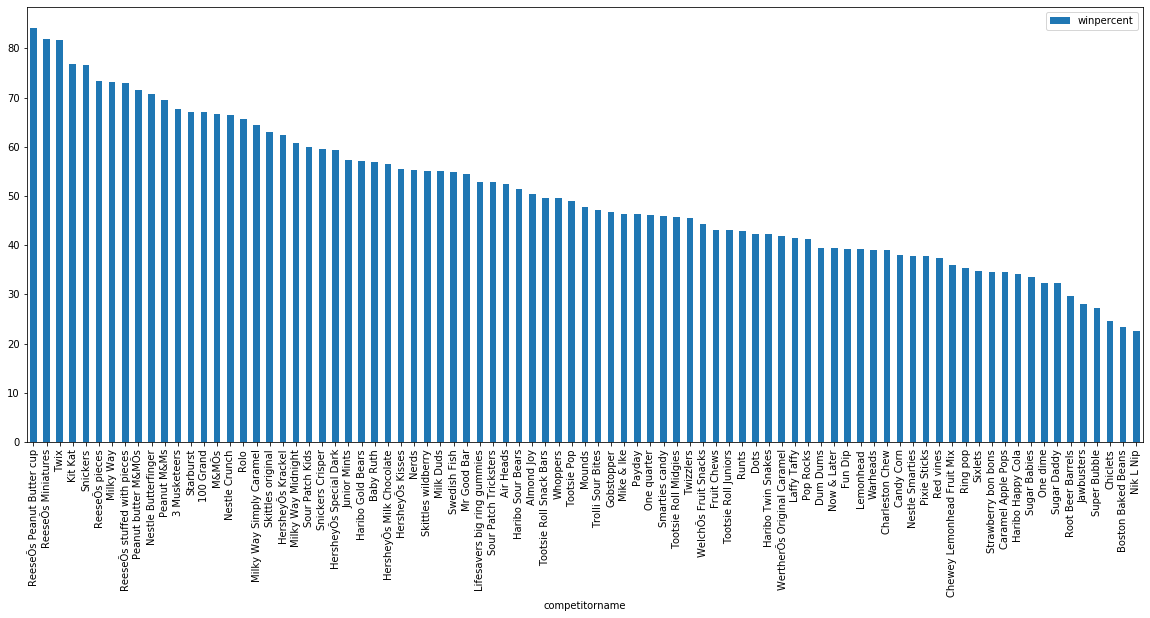

In [3]:
candy = candy.sort_values(by = "winpercent", ascending=False)
candy.plot(kind='bar', y='winpercent', figsize = (20,8));

## Lets use group and plotting to analyze the data

* Group will show us aggregated data about groups of the data (ex. average score of chocolate candy vs. non chocolate candy)
* Plotting will give us visual insights to the data

### Grouping

Get the mean sugar, price and win percent for candy with chocolate, and without chocolate.

Which means there will be 2 rows for no chocolate and chocolate, and 3 columns for the percents.

In [5]:
candy.groupby("chocolate").mean()\
            .get(["sugarpercent", "pricepercent", "winpercent"])

,sugarpercent,pricepercent,winpercent
chocolate,,,
0,0.452937,0.343021,42.142257
1,0.512000,0.632162,60.921529


We haven't discussed it yet, but it turns out that you can group by *multiple columns*.
If we groupby chocolate and caramel, and take the mean how many rows do you think we will have?
```Python
candy.groupby(["chocolate", "caramel"]).mean().get(["sugarpercent", "pricepercent", "winpercent"])
```

In [6]:
candy.groupby(["chocolate", "caramel"]).mean().get(["sugarpercent", "pricepercent", "winpercent"])

sugarpercent  pricepercent  winpercent
chocolate caramel                                        
0         0            0.444727      0.335932   42.744041
          1            0.543250      0.421000   35.522633
1         0            0.461074      0.601185   59.012238
          1            0.649500      0.715800   66.076617

How about the below, how many columns we would get?
```Python
candy.groupby(["chocolate", "caramel", "bar"]).mean().get(["sugarpercent", "pricepercent", "winpercent"])
```

In [7]:
candy.groupby(["chocolate", "caramel", "bar"]).mean().get(["sugarpercent", "pricepercent", "winpercent"])

sugarpercent  pricepercent  winpercent
chocolate caramel bar                                        
0         0       0        0.444256      0.325907   42.661423
                  1        0.465000      0.767000   46.296597
          1       0        0.543250      0.421000   35.522633
1         0       0        0.477667      0.502733   59.493944
                  1        0.440333      0.724250   58.410104
          1       0        0.581000      0.685500   60.390179
                  1        0.666625      0.723375   67.498227

### Plotting

In [8]:
candy

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
...,...,...,...,...,...,...,...,...,...,...,...,...
Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988


Let's create a histogram of the winpercentages.
How about the below:
```Python
candy.plot(kind='hist', bins = 30)
```

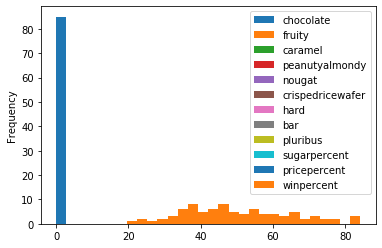

In [10]:
candy.plot(kind='hist', bins = 30);

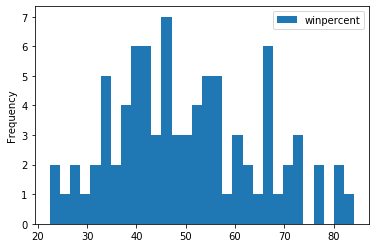

In [11]:
candy.plot(kind='hist', y= "winpercent", bins = 30);

Create a pie chart of mean win percentages for the two flavors *fruity* and *caramel*

The slices will be as follows
* Fruity: False, Caramel: False
* Fruity: False, Caramel: True
* Fruity: True, Caramel: False
* Fruity: True, Caramel: True

In [24]:
# Type of pie_data will be series
# Get the mean win percent for flavors with and without fruity & caramel
# Hint: groupby and mean functions
pie_data = candy.groupby(["caramel", "fruity"]).mean()\
          .get("winpercent")
pie_data

caramel  fruity
0        0         53.883404
         1         44.379257
1        0         59.103002
         1         34.517681
Name: winpercent, dtype: float64

In [25]:
type(pie_data)

pandas.core.series.Series

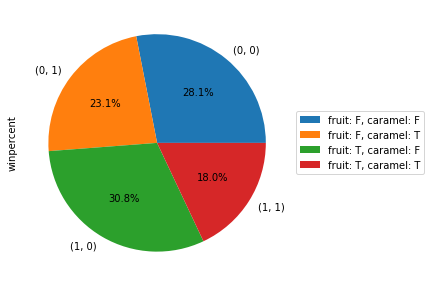

In [26]:
ax = pie_data.plot(kind = 'pie', figsize = (5,5), autopct='%1.1f%%')
ax.legend(["fruit: F, caramel: F",
          "fruit: F, caramel: T",
          "fruit: T, caramel: F",
          "fruit: T, caramel: T",
          ],  loc="right", bbox_to_anchor=(1, 0, 0.5, 1));

# Functions and Apply
---

Review: How do you make a function return a string that is lowercased?

In [27]:
def lowercase(string):
    return string.lower()

lowercase("sTrInG")

'string'

We can use functions to clean up messy data. A good example of messy data comes from a column of user inputted data

In [28]:
survey_responses = bpd.DataFrame().assign(
    name = ["Cust1", "Cust2", "Cust3", "Cust4", "Cust5", " Cust6"],
    ord_food = ["Pizza", "pizza", "turkey sandwich", "pepperoni pizza", "Pepperoni Pizza", "ham sandwich"], 
    phone_num = ["123-456-7890", "(123) 456-7890", "1234567890", "(123)4567890", "123 456 7890", "(123)456-7890"]
)
survey_responses = survey_responses.set_index("name")
survey_responses

,ord_food,phone_num
name,,
Cust1,Pizza,123-456-7890
Cust2,pizza,(123) 456-7890
Cust3,turkey sandwich,1234567890
Cust4,pepperoni pizza,(123)4567890
Cust5,Pepperoni Pizza,123 456 7890
Cust6,ham sandwich,(123)456-7890


This table has difficult to access and analyze data. We can use our own functions and apply to clean it up.

1. clean up ord_food by making it lowercase and only the last word of the input

2. clean up the phone_num by making it a string with only 10 digits in it (what about storing it as an int?)

In [33]:
# Make a function to clean up one entry of ord_food (lowercase and only last word)
# Hint: use lower() and split(" ") functions
def clean_ord_food(string):
    return string.lower().split(" ")[-1]
    
clean_ord_food("tHIs IS a Test - piZZa!")

'pizza!'

In [34]:
survey_responses

,ord_food,phone_num
name,,
Cust1,Pizza,123-456-7890
Cust2,pizza,(123) 456-7890
Cust3,turkey sandwich,1234567890
Cust4,pepperoni pizza,(123)4567890
Cust5,Pepperoni Pizza,123 456 7890
Cust6,ham sandwich,(123)456-7890


Let's apply this function to our table

In [35]:
def clean_fav_food(string):
    return string.lower().split(" ")[-1]

In [37]:
# apply this function to the ord_food column
new_col = survey_responses.get("ord_food").apply(clean_fav_food)
new_col

name
Cust1        pizza
Cust2        pizza
Cust3     sandwich
Cust4        pizza
Cust5        pizza
 Cust6    sandwich
Name: ord_food, dtype: object

In [38]:
survey_responses = survey_responses.drop(columns = "ord_food").assign(ord_food_clean = new_col)
survey_responses

,phone_num,ord_food_clean
name,,
Cust1,123-456-7890,pizza
Cust2,(123) 456-7890,pizza
Cust3,1234567890,sandwich
Cust4,(123)4567890,pizza
Cust5,123 456 7890,pizza
Cust6,(123)456-7890,sandwich


Make a function to clean up one entry of phone (10 digit string)

In [41]:
def clean_phone(phone):
    return phone.replace("(","")\
                .replace(")","")\
                .replace("-","")\
                .replace(" ", "")\
                .replace("*", "")

def clean_phone_v2(phone):
    digits = ['0','1','2','3','4','5','6','7','8','9']
    return ''.join(c for c in phone if c in digits) # using a generator
    
print(clean_phone("(123)456-***7890"))
print(clean_phone_v2("(123)456-***7890"))

1234567890
1234567890


Let's apply it to the table

Replace the previous phone_num column with a new column, where clean phone is applied.

In [42]:
new_col = survey_responses.get("phone_num").apply(clean_phone)
survey_responses = survey_responses.drop(columns = "phone_num").assign(phone_num_clean = new_col)
survey_responses

,ord_food_clean,phone_num_clean
name,,
Cust1,pizza,1234567890
Cust2,pizza,1234567890
Cust3,sandwich,1234567890
Cust4,pizza,1234567890
Cust5,pizza,1234567890
Cust6,sandwich,1234567890


Let's go back to the candy dataset and use the apply method.

In [43]:
candy = bpd.read_csv("data/candy.csv")
candy = candy.set_index("competitorname")
candy.get(["sugarpercent", "pricepercent", "winpercent"])

,sugarpercent,pricepercent,winpercent
competitorname,,,
100 Grand,0.732,0.860,66.971725
3 Musketeers,0.604,0.511,67.602936
One dime,0.011,0.116,32.261086
One quarter,0.011,0.511,46.116505
Air Heads,0.906,0.511,52.341465
...,...,...,...
Twizzlers,0.220,0.116,45.466282
Warheads,0.093,0.116,39.011898
WelchÕs Fruit Snacks,0.313,0.313,44.375519


Instead of the floating point numbers, let's turn the values into categories.

For sugar percent and price percent:

Assign all numbers between 0.0 - 0.1 to 0.

* 0.0 to 0.1 --> 0
* 0.1 to 0.2 --> 1
* 0.3 to 0.4 --> 2
* 0.4 to 0.5 --> 3
* ...
* 0.9 to 1.0 --> 9

In [44]:
x = 5.5656

In [45]:
int(x)

5

In [46]:
def into_category(ratio):
    ratio = ratio * 10
    return int(ratio)
candy.get("sugarpercent").apply(into_category)

competitorname
100 Grand                     7
3 Musketeers                  6
One dime                      0
One quarter                   0
Air Heads                     9
                             ..
Twizzlers                     2
Warheads                      0
WelchÕs Fruit Snacks          3
WertherÕs Original Caramel    1
Whoppers                      8
Name: sugarpercent, Length: 85, dtype: int64

In [47]:
sugar_categ = candy.get("sugarpercent").apply(into_category)
candy = candy.assign(sugar_category = sugar_categ)
candy.get(["sugar_category", "pricepercent", "winpercent"])

,sugar_category,pricepercent,winpercent
competitorname,,,
100 Grand,7,0.860,66.971725
3 Musketeers,6,0.511,67.602936
One dime,0,0.116,32.261086
One quarter,0,0.511,46.116505
Air Heads,9,0.511,52.341465
...,...,...,...
Twizzlers,2,0.116,45.466282
Warheads,0,0.116,39.011898
WelchÕs Fruit Snacks,3,0.313,44.375519


Let's apply the same idea to the pricepercent and winpercent columns.

Write a single function that can be used to turn all percentages into categories.

Pricepercent is in the same range as sugarpercent, but how to deal with winpercent?

In [48]:
candy.get(["sugarpercent", "pricepercent", "winpercent"])

,sugarpercent,pricepercent,winpercent
competitorname,,,
100 Grand,0.732,0.860,66.971725
3 Musketeers,0.604,0.511,67.602936
One dime,0.011,0.116,32.261086
One quarter,0.011,0.511,46.116505
Air Heads,0.906,0.511,52.341465
...,...,...,...
Twizzlers,0.220,0.116,45.466282
Warheads,0.093,0.116,39.011898
WelchÕs Fruit Snacks,0.313,0.313,44.375519


In [49]:
# A hint on how to deal with winpercent
candy.get("winpercent").min()

22.445341

In [61]:
def into_category(ratio):
    if ratio > 1:
        ratio = ratio / 10
    else:
        ratio = ratio * 10
    return int(ratio)

In [62]:
price_categ = candy.get("pricepercent").apply(into_category)
win_categ   = candy.get("winpercent").apply(into_category)
candy = candy.assign(price_category = price_categ,
                     win_category = win_categ)
candy.get(["sugar_category", "price_category", "win_category"])

,sugar_category,price_category,win_category
competitorname,,,
100 Grand,7,8,6
3 Musketeers,6,5,6
One dime,0,1,3
One quarter,0,5,4
Air Heads,9,5,5
...,...,...,...
Twizzlers,2,1,4
Warheads,0,1,3
WelchÕs Fruit Snacks,3,3,4


We have 10 price categories from 0 to 9.

Let's print the distribution of these categories in a pie chart:

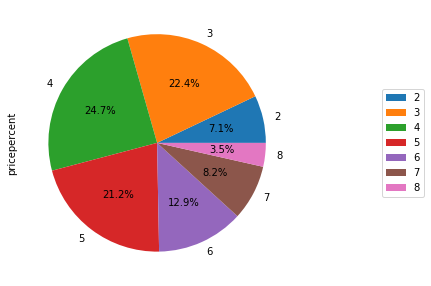

In [65]:
price_categories = candy.groupby("win_category").count()
ax = price_categories.get("pricepercent").plot(kind = 'pie', figsize = (5,5), autopct='%1.1f%%')
ax.legend(loc="right", bbox_to_anchor=(1, 0, 0.5, 1))

## Our dataset is now clean and ready for analysis!

# More Practice! Today's New Dataset:
---

From kaggle user Randi H Griffin:
>This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018. The R code I used to scrape and wrangle the data is on GitHub. I recommend checking my kernel before starting your own analysis.
>
>Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.
>
>The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:
>
>1. ID - Unique number for each athlete  
>2. Name - Athlete's name  
>3. Sex - M or F  
>4. Age - Integer  
>5. Height - In centimeters  
>6. Weight - In kilograms  
>7. Team - Team name  
>8. NOC - National Olympic Committee 3-letter code  
>9. Games - Year and season  
>10. Year - Integer  
>11. Season - Summer or Winter  
>12. City - Host city  
>13. Sport - Sport  
>14. Event - Event  
>15. Medal - Gold, Silver, Bronze, or NA  


In [75]:
data = bpd.read_csv("data/athlete_events.csv")
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


Let's decide if we can set an index. The best candidates seem to be the columns ID and Name.

How can we decide if these would be good candidates for an index?

We should check whether they are unique

Given the data, test for the uniqueness of the *Name* and *ID* columns.

In [76]:
# Hint: use the .unique() and len() functions
col1 = data.get("Name")
print(len(col1) == len(col1.unique()))

col2 = data.get("ID")
print(len(col1) == len(col1.unique()))

False
False


Below we do some data cleaning, removing the NaN values. The details of it are not important for us right now.

In [77]:
nans = np.argwhere(np.isnan(data.get("Age")) | np.isnan(data.get("Height")) | np.isnan(data.get("Weight")))
print("We're getting rid of rows like below")
data.take(nans[:3].flatten()) # This line is just to show us what these mismatched rows look like

We're getting rid of rows like below


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [78]:
before_drop = len(data)
data = data.drop(data.index[nans])
after_drop = len(data)
print("rows dropped:", before_drop - after_drop)

rows dropped: 64951


Since the dataset is quite big, let's look at only years after 1992 to make working on it simpler (for the discussion)

In [79]:
# Saving the full dataset in a separate variable just in case
all_years = data
data = data[data.get("Year") >= 1992]
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


# Many interesting analysis possibilities:
---
1. Average age of medal winners.
    - Does this change for males and females?
    - min/max age of medal winners?
        - find their entries
2. Sports with the tallest/heaviest/oldest participants?
3. Count of sport season by team country.
4. Plot age by year, possibly split by sex.

Warmup: Sort the Sports according to their heaviest average competitor weight. 

In [80]:
data.get("Sport").unique()

array(['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
       'Ice Hockey', 'Badminton', 'Sailing', 'Biathlon', 'Athletics',
       'Alpine Skiing', 'Weightlifting', 'Wrestling', 'Rowing',
       'Bobsleigh', 'Swimming', 'Football', 'Equestrianism', 'Gymnastics',
       'Taekwondo', 'Fencing', 'Diving', 'Canoeing', 'Handball',
       'Water Polo', 'Tennis', 'Cycling', 'Boxing', 'Hockey',
       'Figure Skating', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Shooting', 'Modern Pentathlon',
       'Table Tennis', 'Nordic Combined', 'Baseball',
       'Rhythmic Gymnastics', 'Freestyle Skiing', 'Luge', 'Rugby Sevens',
       'Trampolining', 'Beach Volleyball', 'Triathlon', 'Curling', 'Golf',
       'Snowboarding', 'Ski Jumping', 'Short Track Speed Skating',
       'Skeleton'], dtype=object)

In [81]:
data.groupby("Sport").mean().sort_values(by = "Weight", ascending=False)

,ID,Age,Height,Weight,Year
Sport,,,,,
Bobsleigh,71262.422886,28.724947,182.759773,92.049396,2002.726368
Basketball,68002.287375,26.624406,191.970946,87.202853,2004.488114
Baseball,67409.477541,26.309693,182.599291,85.718085,2000.737589
Water Polo,71110.756539,26.513749,185.791415,85.568746,2005.955734
Handball,67035.726451,27.235014,183.900571,82.142245,2005.347288
Ice Hockey,71669.459004,26.579429,179.348463,81.947474,2003.442899
Rowing,70694.929187,26.459368,185.556310,80.826627,2004.101385
Volleyball,69734.713418,26.128106,189.820541,80.610160,2005.007178
Weightlifting,71254.264861,24.791942,167.373844,80.396301,2005.537649


# Repeat Participants vs One-Timers
---

Who showed up multiple times?  Who only showed up once?

Can we get a table of just those people and their data?

In [85]:
# Let's get how many times each athlete shows up
counts = data.groupby(["Name"]).count()
counts

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Name,,,,,,,,,,,,,,
Th Anh,1,1,1,1,1,1,1,1,1,1,1,1,1,0
Th Ngn Thng,7,7,7,7,7,7,7,7,7,7,7,7,7,0
A Dijiang,1,1,1,1,1,1,1,1,1,1,1,1,1,0
A Lamusi,1,1,1,1,1,1,1,1,1,1,1,1,1,0
"A. J. Tyronne Benildus ""Benny"" Fernando",1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zge Bayrak,1,1,1,1,1,1,1,1,1,1,1,1,1,0
zge Krdar emberci,1,1,1,1,1,1,1,1,1,1,1,1,1,0
zlem Kaya,2,2,2,2,2,2,2,2,2,2,2,2,2,0


In [86]:
counts = counts.get("ID")
counts

Name
 Th Anh                                    1
 Th Ngn Thng                               7
A Dijiang                                  1
A Lamusi                                   1
A. J. Tyronne Benildus "Benny" Fernando    1
                                          ..
zge Bayrak                                 1
zge Krdar emberci                          1
zlem Kaya                                  2
zzet Safer                                 1
zzet nce                                   2
Name: ID, Length: 56427, dtype: int64

In [87]:
# Let's get the names of the people that attended multiple times
repeat_names = counts[counts > 1]
repeat_names

Name
 Th Ngn Thng              7
A. Joshua "Josh" West     2
Aagje Vanwalleghem        5
Aarn Sarmiento Padilla    2
Aaron Arthur Cook         2
                         ..
ystein Slettemark         2
yvind Berg                5
zdemir Akbal              2
zlem Kaya                 2
zzet nce                  2
Name: ID, Length: 25275, dtype: int64

Write a function that determines if a given name is a repeated name.

In [89]:
repeat_names

Name
 Th Ngn Thng              7
A. Joshua "Josh" West     2
Aagje Vanwalleghem        5
Aarn Sarmiento Padilla    2
Aaron Arthur Cook         2
                         ..
ystein Slettemark         2
yvind Berg                5
zdemir Akbal              2
zlem Kaya                 2
zzet nce                  2
Name: ID, Length: 25275, dtype: int64

In [90]:
s = "arda"

In [91]:
s in repeat_names

False

In [93]:
def is_repeated(s):
    return s in repeat_names

# Getting only the athletes that repeated
repeats = data[data.get("Name").apply(is_repeated)]
repeats

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
repeater_athletes = repeats.get("Name").unique()
print(repeater_athletes)
print(len(repeater_athletes))

# Sort According to both Height and Weight
---

In [94]:
data.get(["Height", "Weight"])

,Height,Weight
0,180.0,80.0
1,170.0,60.0
6,185.0,82.0
7,185.0,82.0
8,185.0,82.0
...,...,...
271110,171.0,69.0
271112,176.0,59.0
271113,176.0,59.0
271114,185.0,96.0


Let's convert into imperial units since we all live in the USA.

And it sounds cooler too, although it is very annoying for anything related to science.

In [95]:
kg2pound  = 2.20462
cm2inch  = 39.3701 / 100

In [96]:
def to_pound(kg):
    pounds = kg * kg2pound
    return pounds
def to_inch(cm):
    inches = cm * cm2inch
    return inches

In [98]:
heights = data.get("Height").apply(to_inch)
weights = data.get("Weight").apply(to_pound)
# We are creating a dictionary to assign multiple columns with a single assign statement
kwargs = {"Height inch":  heights, "Weight pound":  weights}
modified_data = data.assign(**kwargs)
modified_data.get(["Name", "Height", "Height inch", "Weight", "Weight pound"])

,Name,Height,Height inch,Weight,Weight pound
0,A Dijiang,180.0,70.866180,80.0,176.36960
1,A Lamusi,170.0,66.929170,60.0,132.27720
6,Christine Jacoba Aaftink,185.0,72.834685,82.0,180.77884
7,Christine Jacoba Aaftink,185.0,72.834685,82.0,180.77884
8,Christine Jacoba Aaftink,185.0,72.834685,82.0,180.77884
...,...,...,...,...,...
271110,Olga Igorevna Zyuzkova,171.0,67.322871,69.0,152.11878
271112,Piotr ya,176.0,69.291376,59.0,130.07258
271113,Piotr ya,176.0,69.291376,59.0,130.07258
271114,Tomasz Ireneusz ya,185.0,72.834685,96.0,211.64352


Let's sort the data according to height and weight combined.

In [100]:
modified_data.sort_values(by = ["Weight pound", "Height inch"], ascending = False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height inch,Weight pound
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN,72.047283,471.78868
23156,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN,72.047283,471.78868
205467,103159,Aytami Ruano Vega,M,27.0,200.0,198.0,Spain,ESP,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Heavyweight,NaN,78.740200,436.51476
206352,103580,Valentyn Rusliakov,M,28.0,187.0,180.0,Ukraine,UKR,2000 Summer,2000,Summer,Sydney,Judo,Judo Men's Heavyweight,NaN,73.622087,396.83160
206004,103413,Leonel Wilfredo Ruz Carmona,M,29.0,187.0,178.0,Venezuela,VEN,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Heavyweight,NaN,73.622087,392.42236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264541,132383,Kana Yamawaki,F,16.0,141.0,28.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Horse Vault,NaN,55.511841,61.72936
264542,132383,Kana Yamawaki,F,16.0,141.0,28.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Uneven Bars,NaN,55.511841,61.72936
264543,132383,Kana Yamawaki,F,16.0,141.0,28.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Balance Beam,NaN,55.511841,61.72936
256836,128605,Wang Xin (Ruoxue-),F,15.0,137.0,28.0,China,CHN,2008 Summer,2008,Summer,Beijing,Diving,Diving Women's Platform,Bronze,53.937037,61.72936


In [99]:
modified_data.sort_values(by = ["Height inch", "Weight pound"], ascending = False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height inch,Weight pound
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,88.976426,310.85142
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN,88.976426,310.85142
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN,88.976426,310.85142
207374,104059,Arvydas Romas Sabonis,M,27.0,223.0,122.0,Lithuania,LTU,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Bronze,87.795323,268.96364
207375,104059,Arvydas Romas Sabonis,M,31.0,223.0,122.0,Lithuania,LTU,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze,87.795323,268.96364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210558,105727,Flvia Lopes Saraiva,F,16.0,133.0,31.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Individual All-Around,NaN,52.362233,68.34322
210559,105727,Flvia Lopes Saraiva,F,16.0,133.0,31.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Team All-Around,NaN,52.362233,68.34322
210560,105727,Flvia Lopes Saraiva,F,16.0,133.0,31.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Floor Exercise,NaN,52.362233,68.34322
210561,105727,Flvia Lopes Saraiva,F,16.0,133.0,31.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Uneven Bars,NaN,52.362233,68.34322


# Body Mass Index

Let's calculate the body mass index from our data and add it to the table.

We are switching to the whole dataset instead of the years after 1992, as our analysis will be simpler.

In [ ]:
# kg / m**2
# weight / height ** 2

In [ ]:
all_years.get(["Height", "Weight"])

I think it is easier to do it without a function.

In [ ]:
heights = all_years.get("Height")
weights = all_years.get("Weight")
bmi = weights / (heights / 100) ** 2
print(bmi)

Plot the histogram of BMI values

In [ ]:
print("Mean: ", bmi.mean())
print("Min:  ", bmi.min())
print("Max:  ", bmi.max())

In [ ]:
bmi.plot(kind='hist', bins=30);

The histogram is relatively tighly centered around the mean, 22.

If we could do a histogram for the whole world, how do you think the histogram would change?

And why?

Let's assign this new series into our table and plot the BMI vs years.

In [ ]:
all_years = all_years.assign(BMI = bmi)
BMI_change = all_years.groupby("Year").mean().get("BMI")

BMI_change.plot(kind = "line", y = "BMI")
plt.title("Years vs BMI")
plt.ylabel("BMI");

Why do you think the zig zags at the end are there?

Let's zoom in to the last 20 datapoints.

In [ ]:
# YOUR CODE IS HERE
plt.title("Years vs BMI")
plt.ylabel("BMI");

Until 1992, the Summer Olympic Games and the Winter Olympic Games were held in the same year.

After 1992, they were separated into different years.